# Notebook 1: Demo Lý thuyết SVD (Singular Value Decomposition)

**Đề tài:** Nén ảnh bằng phương pháp SVD

**Sinh viên:** Năm 3 - ĐHKHTN

**Mục tiêu:** Hiểu lý thuyết SVD và cách áp dụng vào nén ảnh

## 1. SVD là gì?

**Singular Value Decomposition (SVD)** là một phương pháp phân tích ma trận trong đại số tuyến tính.

### Định nghĩa:

Với bất kỳ ma trận A kích thước m×n, ta có thể phân tích:

$$A = U \times \Sigma \times V^T$$

Trong đó:
- **U**: Ma trận m×m, các cột là **left singular vectors** (trực giao)
- **Σ**: Ma trận m×n, đường chéo chứa **singular values** σ₁ ≥ σ₂ ≥ ... ≥ σₙ ≥ 0
- **V^T**: Ma trận n×n, các hàng là **right singular vectors** (trực giao)

### Tính chất quan trọng:
1. U và V là ma trận trực giao: U^T U = I, V^T V = I
2. Singular values được sắp xếp giảm dần
3. SVD luôn tồn tại cho mọi ma trận

In [1]:
# Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập cho plots
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("Đã import thư viện thành công!")

Đã import thư viện thành công!


## 2. Demo SVD với ma trận đơn giản

Tạo một ma trận 4×5 đơn giản để demo SVD:

In [3]:
# Tạo ma trận test
np.random.seed(42)
A = np.array([
    [1, 2, 3, 4, 5],
    [2, 4, 6, 8, 10],
    [3, 6, 9, 12, 15],
    [1, 3, 5, 7, 9]
], dtype=np.float64)

print("Ma trận A (4×5):")
print(A)
print(f"\nShape: {A.shape}")

Ma trận A (4×5):
[[ 1.  2.  3.  4.  5.]
 [ 2.  4.  6.  8. 10.]
 [ 3.  6.  9. 12. 15.]
 [ 1.  3.  5.  7.  9.]]

Shape: (4, 5)


### Áp dụng SVD:

In [4]:
# Thực hiện SVD
U, S, Vt = np.linalg.svd(A, full_matrices=False)

print("Kết quả SVD:")
print(f"\nU shape: {U.shape}")
print(U)

print(f"\nS (singular values) shape: {S.shape}")
print(S)

print(f"\nVt shape: {Vt.shape}")
print(Vt)

Kết quả SVD:

U shape: (4, 4)
[[ 2.42612090e-01  1.12106848e-01  9.63620848e-01 -2.50814145e-03]
 [ 4.85224180e-01  2.24213696e-01 -1.50415039e-01 -8.31661608e-01]
 [ 7.27836269e-01  3.36320543e-01 -2.20930256e-01  5.55277119e-01]
 [ 4.19465415e-01 -9.07771318e-01  1.85464196e-16 -5.05603173e-17]]

S (singular values) shape: (4,)
[3.05655155e+01 8.65600095e-01 3.51585441e-16 2.82351754e-17]

Vt shape: (4, 5)
[[ 0.12484771  0.26341891  0.40199011  0.5405613   0.6791325 ]
 [ 0.76446913  0.4802192   0.19596927 -0.08828066 -0.37253059]
 [-0.20007711  0.07850852 -0.11440236  0.79358762 -0.55761667]
 [-0.45728559  0.83292219 -0.23833897 -0.1929463   0.05564866]]


### Verify: Kiểm tra A = U × Σ × V^T

In [5]:
# Tái tạo A từ U, S, Vt
A_reconstructed = U @ np.diag(S) @ Vt

print("Ma trận A tái tạo:")
print(A_reconstructed)

print("\nKiểm tra sai số:")
error = np.abs(A - A_reconstructed)
print(f"Max error: {np.max(error):.2e}")
print(f"Mean error: {np.mean(error):.2e}")

if np.max(error) < 1e-10:
    print("\n✅ Verify thành công: A = U × Σ × V^T")
else:
    print("\n❌ Có lỗi trong tính toán")

Ma trận A tái tạo:
[[ 1.  2.  3.  4.  5.]
 [ 2.  4.  6.  8. 10.]
 [ 3.  6.  9. 12. 15.]
 [ 1.  3.  5.  7.  9.]]

Kiểm tra sai số:
Max error: 5.33e-15
Mean error: 1.37e-15

✅ Verify thành công: A = U × Σ × V^T


## 3. Visualize các ma trận U, Σ, V^T

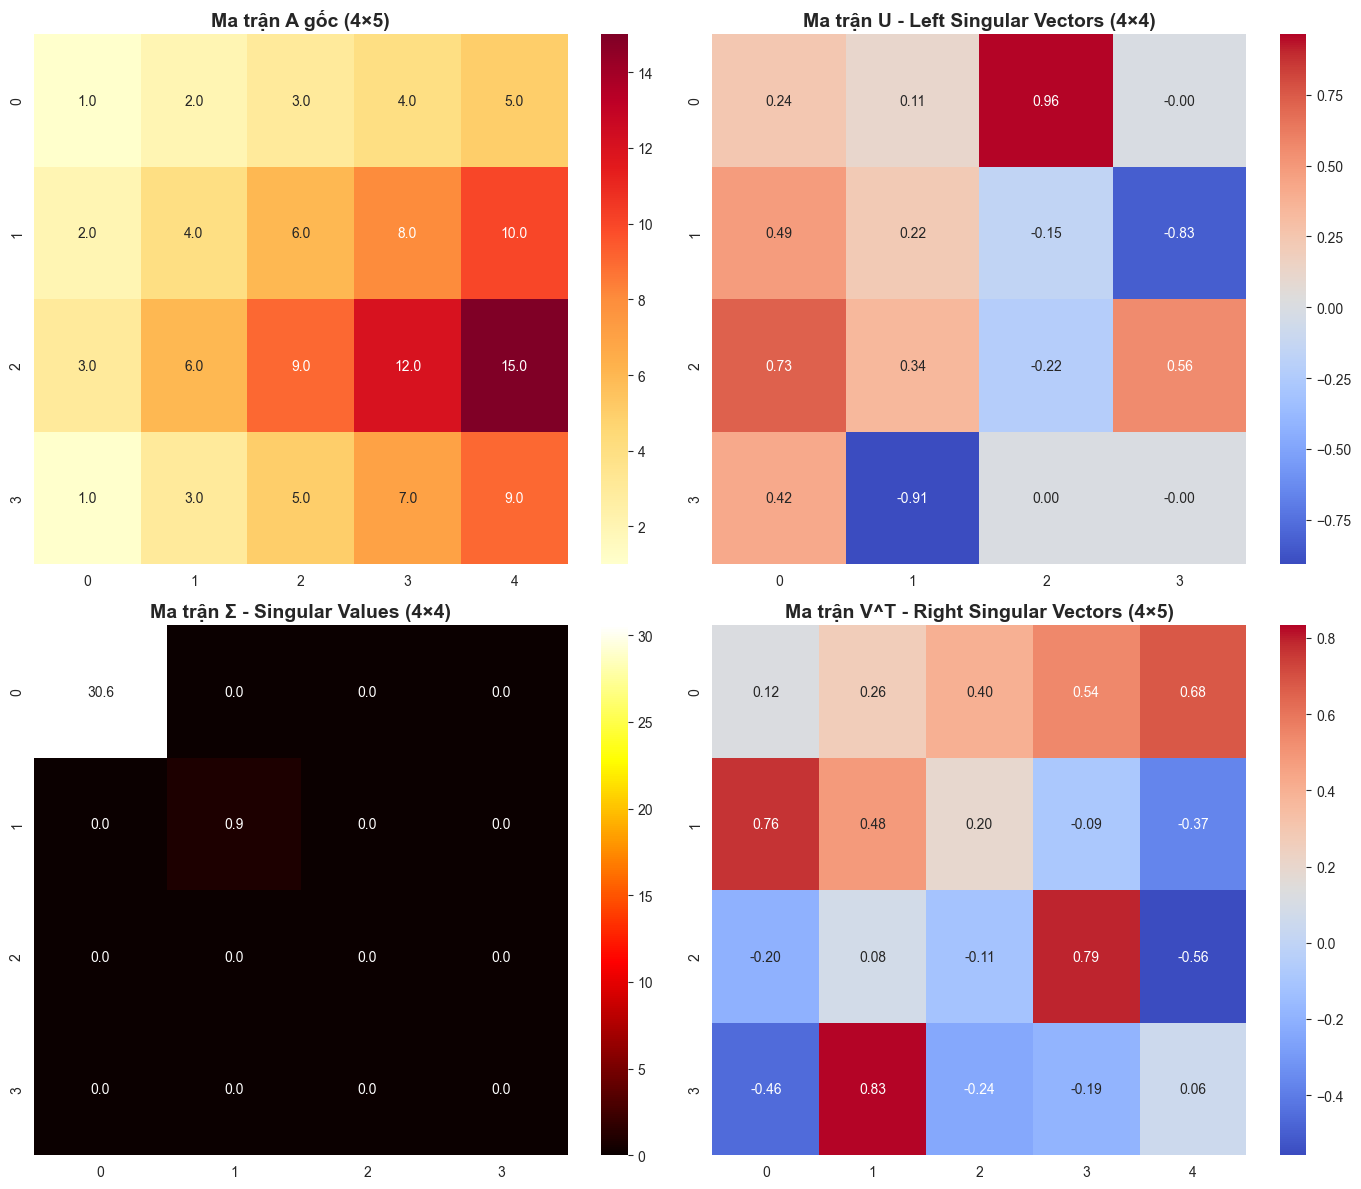

In [6]:
# Visualize các ma trận
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Ma trận A gốc
sns.heatmap(A, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[0, 0], cbar=True)
axes[0, 0].set_title('Ma trận A gốc (4×5)', fontsize=14, fontweight='bold')

# Ma trận U
sns.heatmap(U, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[0, 1], cbar=True)
axes[0, 1].set_title('Ma trận U - Left Singular Vectors (4×4)', fontsize=14, fontweight='bold')

# Ma trận Σ (diagonal)
Sigma_full = np.zeros((len(S), len(S)))
np.fill_diagonal(Sigma_full, S)
sns.heatmap(Sigma_full, annot=True, fmt='.1f', cmap='hot', ax=axes[1, 0], cbar=True)
axes[1, 0].set_title('Ma trận Σ - Singular Values (4×4)', fontsize=14, fontweight='bold')

# Ma trận V^T
sns.heatmap(Vt, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1], cbar=True)
axes[1, 1].set_title('Ma trận V^T - Right Singular Vectors (4×5)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Phân tích Singular Values

Singular values cho biết "tầm quan trọng" của mỗi component trong SVD.

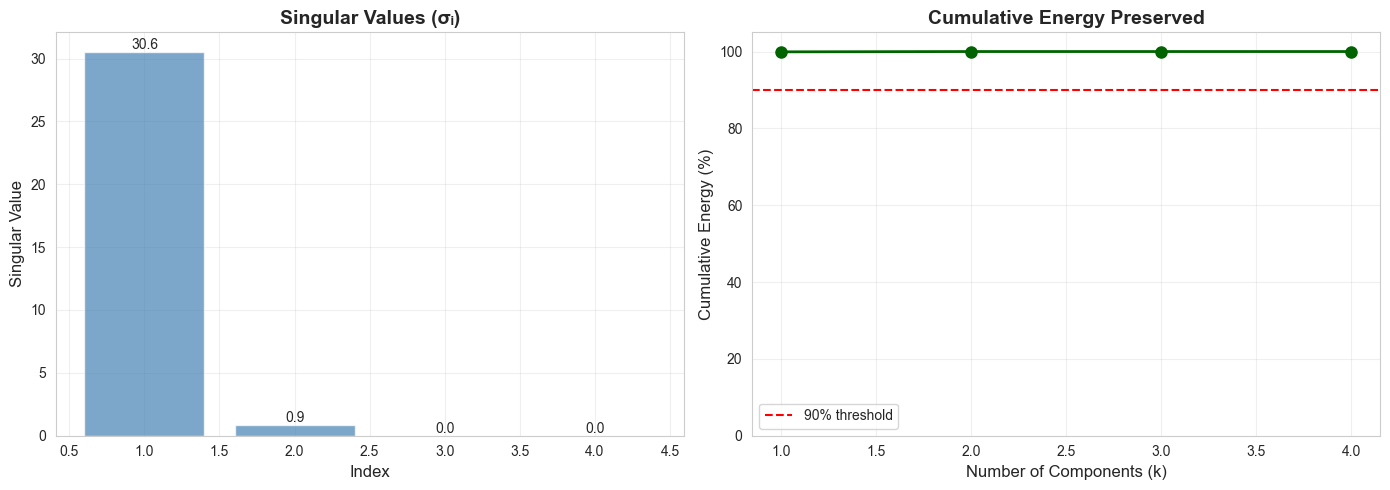

Cumulative Energy:
k=1: 99.92%
k=2: 100.00%
k=3: 100.00%
k=4: 100.00%


In [8]:
# Plot singular values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Singular values
axes[0].bar(range(1, len(S)+1), S, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Index', fontsize=12)
axes[0].set_ylabel('Singular Value', fontsize=12)
axes[0].set_title('Singular Values (σᵢ)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# In giá trị
for i, val in enumerate(S):
    axes[0].text(i+1, val, f'{val:.1f}', ha='center', va='bottom')

# Plot 2: Cumulative energy
cumulative_energy = np.cumsum(S**2) / np.sum(S**2) * 100
axes[1].plot(range(1, len(S)+1), cumulative_energy, marker='o', 
             linewidth=2, markersize=8, color='darkgreen')
axes[1].axhline(y=90, color='red', linestyle='--', label='90% threshold')
axes[1].set_xlabel('Number of Components (k)', fontsize=12)
axes[1].set_ylabel('Cumulative Energy (%)', fontsize=12)
axes[1].set_title('Cumulative Energy Preserved', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 105])

plt.tight_layout()
plt.show()

print("Cumulative Energy:")
for i, energy in enumerate(cumulative_energy):
    print(f"k={i+1}: {energy:.2f}%")

## 5. Low-Rank Approximation: Nén ma trận với k components

Ý tưởng nén: Chỉ giữ k singular values lớn nhất!

$$A_k = U_{:,:k} \times \Sigma_{:k,:k} \times V^T_{:k,:}$$

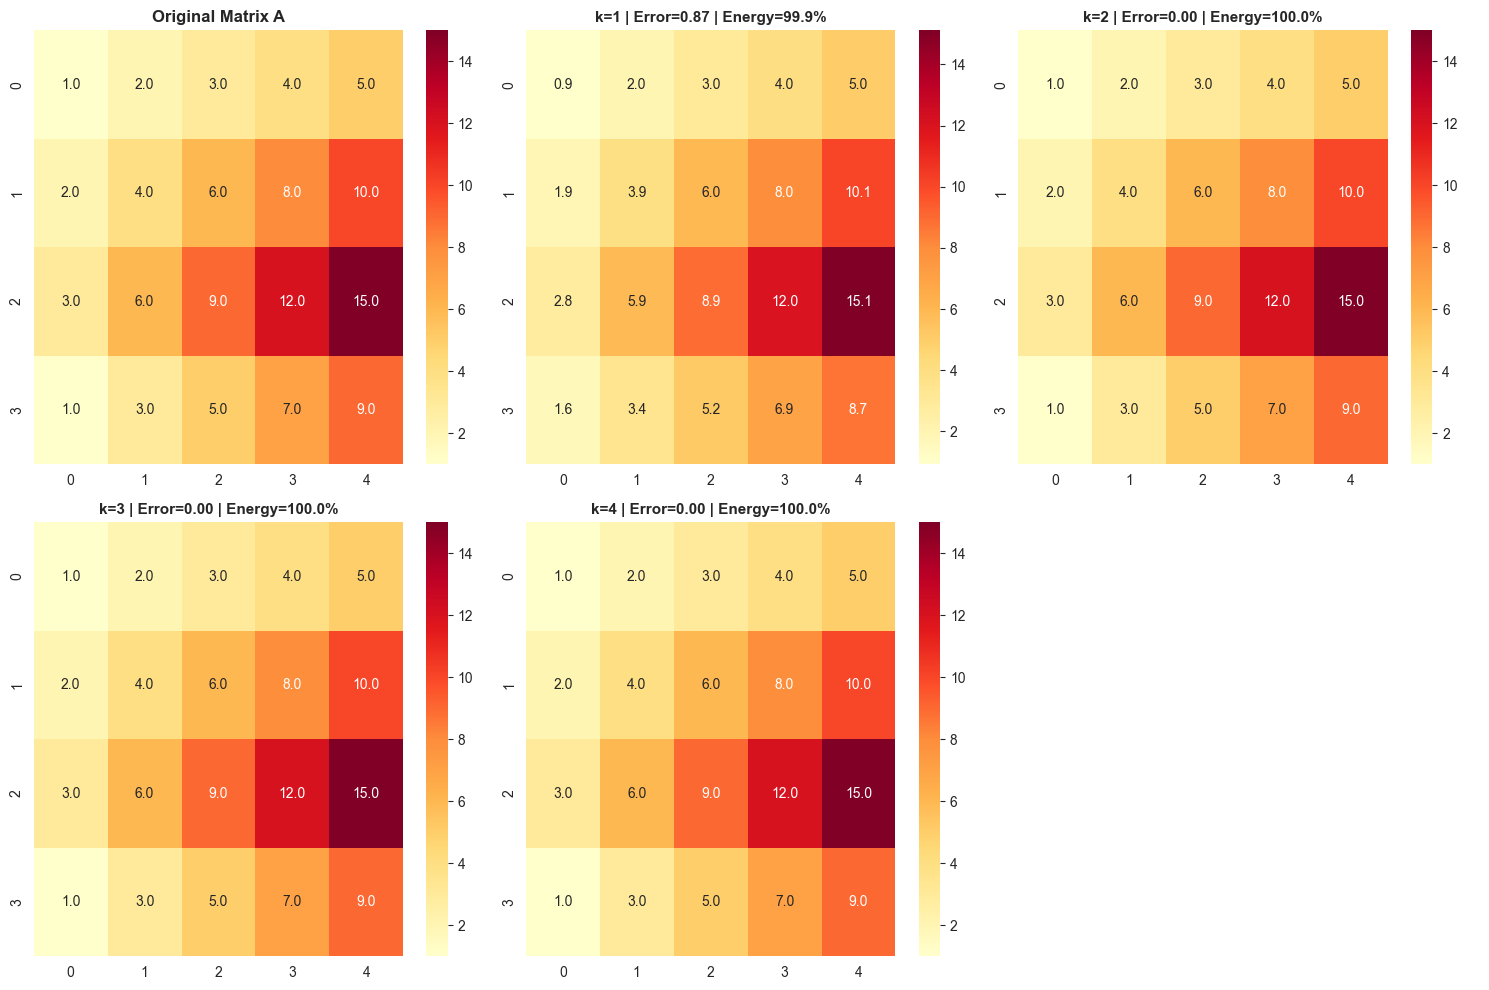

In [9]:
# Test với k khác nhau
k_values = [1, 2, 3, 4]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot ma trận gốc
sns.heatmap(A, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[0], cbar=True)
axes[0].set_title('Original Matrix A', fontsize=12, fontweight='bold')

# Plot các approximations
for idx, k in enumerate(k_values, start=1):
    # Tái tạo với k components
    A_k = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    
    # Tính sai số
    error = np.linalg.norm(A - A_k, 'fro')
    energy = cumulative_energy[k-1]
    
    # Plot
    sns.heatmap(A_k, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[idx], cbar=True)
    axes[idx].set_title(f'k={k} | Error={error:.2f} | Energy={energy:.1f}%', 
                        fontsize=11, fontweight='bold')

# Ẩn subplot thừa
axes[-1].axis('off')

plt.tight_layout()
plt.show()

## 6. Compression Ratio

Tính lượng dữ liệu tiết kiệm được khi dùng k components:

In [10]:
# Tính compression ratio
m, n = A.shape
original_size = m * n

print("Compression Analysis:")
print(f"Original matrix size: {m} × {n} = {original_size} values\n")

for k in range(1, min(m, n) + 1):
    # Compressed size: U[:,:k] + S[:k] + Vt[:k,:]
    compressed_size = k * m + k + k * n
    compressed_size = k * (m + n + 1)
    
    ratio = compressed_size / original_size
    space_saved = (1 - ratio) * 100
    
    print(f"k={k}: Compressed={compressed_size} values | "
          f"Ratio={ratio:.2f} | Space saved={space_saved:.1f}%")

Compression Analysis:
Original matrix size: 4 × 5 = 20 values

k=1: Compressed=10 values | Ratio=0.50 | Space saved=50.0%
k=2: Compressed=20 values | Ratio=1.00 | Space saved=0.0%
k=3: Compressed=30 values | Ratio=1.50 | Space saved=-50.0%
k=4: Compressed=40 values | Ratio=2.00 | Space saved=-100.0%


## 7. Ý nghĩa trong Image Compression

### Ảnh là ma trận!

- **Ảnh grayscale**: Ma trận 2D (m×n), mỗi phần tử là giá trị pixel [0, 255]
- **Ảnh RGB**: Ma trận 3D (m×n×3), mỗi kênh R, G, B là ma trận 2D

### Quy trình nén:

1. **Input**: Ảnh A (m×n)
2. **SVD**: A = U × Σ × V^T
3. **Chọn k**: Giữ k singular values lớn nhất
4. **Compress**: A_k = U[:,:k] × Σ[:k,:k] × V^T[:k,:]
5. **Output**: Ảnh nén A_k

### Trade-off:

- **k nhỏ**: Nén mạnh, tiết kiệm dung lượng, nhưng mất nhiều chi tiết
- **k lớn**: Nén ít, giữ được chi tiết, nhưng tiết kiệm ít dung lượng

→ Cần chọn k tối ưu dựa trên yêu cầu chất lượng (PSNR) và dung lượng!

## 8. Demo với ma trận lớn hơn (giả lập ảnh)

Tạo ma trận 50×50 để mô phỏng ảnh nhỏ:

In [ ]:
# Tạo "ảnh" test
# Tạo "ảnh" test giả lập
np.random.seed(123)
image_matrix = np.random.randint(0, 256, (50, 50)).astype(np.float64)

# Thêm structure (để giống ảnh thật hơn)
x = np.linspace(0, 2*np.pi, 50)
y = np.linspace(0, 2*np.pi, 50)
X, Y = np.meshgrid(x, y)
pattern = 128 + 127 * np.sin(X) * np.cos(Y)
image_matrix = (image_matrix * 0.3 + pattern * 0.7).astype(np.float64)

print(f"Image matrix shape: {image_matrix.shape}")
print(f"Min: {image_matrix.min():.1f}, Max: {image_matrix.max():.1f}")

# Visualize
plt.figure(figsize=(8, 6))
plt.imshow(image_matrix, cmap='gray')
plt.colorbar(label='Pixel Value')
plt.title('Test "Image" (50×50)', fontsize=14, fontweight='bold')
plt.show()

TypeError: Unsupported dtype dtype('float64') for randint

In [ ]:
# SVD trên "ảnh"
U_img, S_img, Vt_img = np.linalg.svd(image_matrix, full_matrices=False)

# Singular value spectrum
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot singular values (log scale)
axes[0].semilogy(range(1, len(S_img)+1), S_img, linewidth=2)
axes[0].set_xlabel('Index', fontsize=12)
axes[0].set_ylabel('Singular Value (log scale)', fontsize=12)
axes[0].set_title('Singular Value Spectrum', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Cumulative energy
cumulative_energy_img = np.cumsum(S_img**2) / np.sum(S_img**2) * 100
axes[1].plot(range(1, len(S_img)+1), cumulative_energy_img, linewidth=2)
axes[1].axhline(y=90, color='red', linestyle='--', label='90% threshold')
axes[1].axhline(y=95, color='orange', linestyle='--', label='95% threshold')
axes[1].axhline(y=99, color='green', linestyle='--', label='99% threshold')
axes[1].set_xlabel('Number of Components (k)', fontsize=12)
axes[1].set_ylabel('Cumulative Energy (%)', fontsize=12)
axes[1].set_title('Energy Preservation', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tìm k cần thiết cho 90%, 95%, 99% energy
k_90 = np.argmax(cumulative_energy_img >= 90) + 1
k_95 = np.argmax(cumulative_energy_img >= 95) + 1
k_99 = np.argmax(cumulative_energy_img >= 99) + 1

print(f"k cần thiết:")
print(f"  90% energy: k={k_90}")
print(f"  95% energy: k={k_95}")
print(f"  99% energy: k={k_99}")

In [ ]:
# So sánh compression với k khác nhau
k_test = [5, 10, 20, 30, 40, 50]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Original
axes[0].imshow(image_matrix, cmap='gray')
axes[0].set_title('Original (k=50)', fontsize=11, fontweight='bold')
axes[0].axis('off')

# Compressed versions
for idx, k in enumerate(k_test, start=1):
    # Reconstruct
    img_k = U_img[:, :k] @ np.diag(S_img[:k]) @ Vt_img[:k, :]
    img_k = np.clip(img_k, 0, 255)
    
    # Compression stats
    m, n = image_matrix.shape
    original_size = m * n
    compressed_size = k * (m + n + 1)
    space_saved = (1 - compressed_size/original_size) * 100
    energy = cumulative_energy_img[k-1]
    
    # Plot
    axes[idx].imshow(img_k, cmap='gray')
    axes[idx].set_title(f'k={k} | Saved={space_saved:.0f}% | Energy={energy:.1f}%', 
                        fontsize=10, fontweight='bold')
    axes[idx].axis('off')

# Hide extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

## 9. Kết luận

### Những điểm chính học được:

1. **SVD** phân tích ma trận A thành U × Σ × V^T
2. **Singular values** sắp xếp giảm dần, thể hiện tầm quan trọng
3. **Low-rank approximation**: Giữ k components lớn nhất để nén
4. **Trade-off**: k nhỏ → nén mạnh nhưng mất chi tiết, k lớn → giữ chi tiết nhưng nén ít
5. **Cumulative energy**: 90% năng lượng thường đạt với k << n

### Bước tiếp theo:

- **Notebook 2**: Áp dụng SVD cho ảnh thật (grayscale)
- **Notebook 3**: Nén ảnh màu RGB
- **Notebook 4**: So sánh và phân tích

---

**Tài liệu tham khảo:**
- Gilbert Strang - "Introduction to Linear Algebra" (Chapter 7)
- Steve Brunton - SVD YouTube Series
- NumPy Documentation: `numpy.linalg.svd`